In [1]:
## predicting tweet sentiments 

In [2]:
from textblob import TextBlob
import pandas as pd
#from wordcloud import WorldCloud
from wordcloud import WordCloud
import numpy as np 
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
df = pd.read_csv("test.csv")

In [4]:
df.head()


,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1387 non-null   float64
 1   original_text    1387 non-null   object 
 2   lang             1387 non-null   object 
 3   retweet_count    1386 non-null   object 
 4   original_author  1387 non-null   object 
dtypes: float64(1), object(4)
memory usage: 32.6+ KB


In [6]:
df.describe()

,id
count,1.387000e+03
mean,1.245343e+18
std,8.000976e+14
min,1.243911e+18
25%,1.244663e+18
50%,1.245410e+18
75%,1.246038e+18
max,1.246720e+18


In [7]:
df.shape


(1387, 5)

In [8]:
df = df[['original_text']]
df.head()


,original_text
0,"3. Yeah, I once cooked potatoes when I was 3 y..."
1,"Happy Mother's Day to all the mums, step-mums,..."
2,"I love the people from the UK, however, when I..."
3,Happy 81st Birthday Happy Mother’s Day to my m...
4,Happy Mothers day to all those wonderful mothe...


In [9]:
##clean the text 
#create a function 

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #remove @mentinons
    text = re.sub(r'#','',text) #removed hastags
    text = re.sub(r'RT[\s]','',text) #removed RT
    text = re.sub(r'https?:\/\/\S+','',text) #remove hyper links 
    
    return text

df['original_text'] = df['original_text'].apply(cleanTxt)
df['original_text']

0       3. Yeah, I once cooked potatoes when I was 3 y...
1       Happy Mother's Day to all the mums, step-mums,...
2       I love the people from the UK, however, when I...
3       Happy 81st Birthday Happy Mother’s Day to my m...
4       Happy Mothers day to all those wonderful mothe...
                              ...                        
1382    Happy Mother’s Day you crazy bitch I’m sorry c...
1383    Mum can't get to the bingo, so we brought the ...
1384    Despite all this bullshit today has been one o...
1385    Happy Mothers Day Firstly to my Queen daniele_...
1386    Mothers Day Walk When you live in a tiny villa...
Name: original_text, Length: 1387, dtype: object

In [10]:
#create a function to get subjectiviety
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get ploratiy
def getPloratiy(text):
    return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['original_text'].apply(getSubjectivity)
df['polarity'] = df['original_text'].apply(getPloratiy)


In [11]:
df

,original_text,subjectivity,polarity
0,"3. Yeah, I once cooked potatoes when I was 3 y...",0.489583,0.184028
1,"Happy Mother's Day to all the mums, step-mums,...",1.000000,0.800000
2,"I love the people from the UK, however, when I...",0.550000,0.531250
3,Happy 81st Birthday Happy Mother’s Day to my m...,0.750000,0.650000
4,Happy Mothers day to all those wonderful mothe...,0.600000,0.487273
...,...,...,...
1382,Happy Mother’s Day you crazy bitch I’m sorry c...,0.710119,-0.028571
1383,"Mum can't get to the bingo, so we brought the ...",0.750000,0.650000
1384,Despite all this bullshit today has been one o...,0.500000,0.500000
1385,Happy Mothers Day Firstly to my Queen daniele_...,0.726190,0.601786


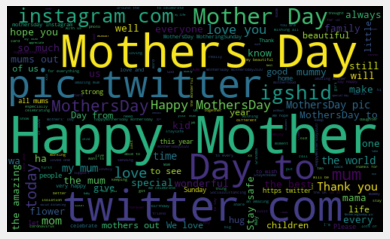

In [12]:
# plot word cloud 
allwrds = ' '.join([twts for twts in df['original_text']])
wordCloud  = WordCloud(width = 500,height = 300,random_state = 21,max_font_size = 119).generate(allwrds)

plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()



In [17]:
#create a function to compute the negative ,netural and positiv analysis

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Netural'
    else:
        return 'Positive'
    
    
    
    
df['anaylsis'] = df['polarity'].apply(getAnalysis)
    

df
    

,original_text,subjectivity,polarity,anaylsis
0,"3. Yeah, I once cooked potatoes when I was 3 y...",0.489583,0.184028,Positive
1,"Happy Mother's Day to all the mums, step-mums,...",1.000000,0.800000,Positive
2,"I love the people from the UK, however, when I...",0.550000,0.531250,Positive
3,Happy 81st Birthday Happy Mother’s Day to my m...,0.750000,0.650000,Positive
4,Happy Mothers day to all those wonderful mothe...,0.600000,0.487273,Positive
...,...,...,...,...
1382,Happy Mother’s Day you crazy bitch I’m sorry c...,0.710119,-0.028571,Negative
1383,"Mum can't get to the bingo, so we brought the ...",0.750000,0.650000,Positive
1384,Despite all this bullshit today has been one o...,0.500000,0.500000,Positive
1385,Happy Mothers Day Firstly to my Queen daniele_...,0.726190,0.601786,Positive
